 # <center>**Project 7: Introduction to Machine Learning**</center>
## <center>By: Sandra Ruiz</center>
## <center>February 19, 2024</center>
                         

## Overview

In this project, we will use machine learning and linear regression for a data set of average high temperatures for New York City from the years 1895 to 2018. The data will be cleaned, inspected, used to create a model using two different methods, that will make predictions for given years and the data visualized to further inspect the data and findings.

In [21]:
## Dependencies:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import pyarrow
import scipy    

## 7.1 Project Setup and Start

New repository in Github created and cloned into VS with:

''' git clone https://github.com/S572396/datafun-07-ml

A vtirual environment was created and activated with:

py -m venv .venv

and actived by:

.\ . venv\Scripts\activate

'''

pip upgraed with:

'''
py -m pip install requests --upgrade pip

Requirements installed with:

pip install jupyterlab pandas pyarrow matplotlib seaborn scipy

Requirements txt file created with:

py -m pip freeze > requirements.txt

.gitignore file created by right click, new file, rename to .gitignore
'''
Project sent to GitHub repository by:

'''
git add . git commit -m "README.md update" git push -u origin main

## 7.2 Examples of Chapter 10

* Please see File ch.10.examples.py where a deck of 52 playing cards prints the original deck and prints the listing of a shuffled deck. Cards are sucessfully shuffled with new values displayed

## 7.3 Machine Learning Exampe of Chapter 15

* Please see example from Folder named ch.15.examples. Data from nyc csv file is used to make predictions for 3 different years and simple linear regression chart is displayed.

## 7.4 Start a New Notebook

* sandraruiz_ml.ipynb file created, git pull was run . 
* Updated author tile and import statements
* git add, git commit, and git push to orign run.

## 7.5 Chart a Straight Line: Part 1
* Using Instructions from Chaper 10.16 to plot Celsius vs Fahrenheit


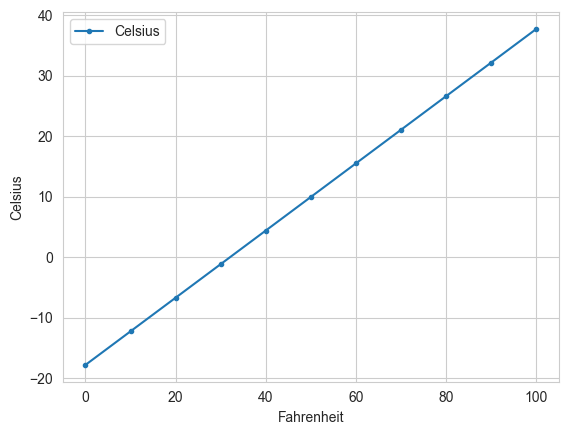

In [22]:
import pandas as pd

# Create Lambda
celsius_conversion = lambda f: 5/9 * (f - 32)
temps = [(f, celsius_conversion(f)) for f in range(0, 101, 10)]

# Create DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot DataFrame with dots and lines
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


## 7.6 Predict Avg High Temp in NYC in January: Part 2

### Introduction
Here we will look at the avg hight temperatures in NYC from 1895-2018. Predictions will also be made.

### Dependencies Used:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

### 1. Data Acquisition
Website: https://www.ncdc.noaa.gov/cag/
* Dataframe downloaded and saved under nyc_df.csv

* Equation Reference: (y = mx +b)

### 2. Data Inspection

In [23]:
import pandas as pd
import os


current_directory = os.getcwd()

file_path = os.path.join(current_directory, 'nyc.csv')

nyc = pd.read_csv(file_path, encoding='utf-8')

# Display the first 4 rows (head)
print("Head of the data:")
print(nyc.head(4))

# Display the last 4 rows (tail)
print("\nTail of the data:")
print(nyc.tail(4))


Head of the data:
     Date  Value  Anomaly
0  189501  26.69    -3.43
1  189601  31.48     1.36
2  189701  28.17    -1.95
3  189801  30.67     0.55

Tail of the data:
       Date  Value  Anomaly
120  201501  33.08     2.96
121  201601  32.22     2.10
122  201701  33.57     3.45
123  201801  32.16     2.04


### 3. Data Cleaning

In [24]:
###Rename 'Value' column as 'Temperature'

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'
print(nyc.head(3))


     Date  Temperature  Anomaly
0  189501        26.69    -3.43
1  189601        31.48     1.36
2  189701        28.17    -1.95


In [25]:
### to view data type
nyc.Date.dtype


dtype('int64')

In [26]:
import pandas as pd
import os


current_directory = os.getcwd()

file_path = os.path.join(current_directory, 'nyc.csv')

nyc = pd.read_csv(file_path, encoding='utf-8')

### To fix date:
nyc.Date= nyc.Date.floordiv(100)
print(nyc.head(3))


   Date  Value  Anomaly
0  1895  26.69    -3.43
1  1896  31.48     1.36
2  1897  28.17    -1.95


### 4. Descriptive Statistics

In [27]:
### using the describe () and set precison
import pandas as pd

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

pd.set_option('display.precision', 2)
nyc.Temperature.describe()



count    124.00
mean      30.46
std        3.06
min       21.90
25%       29.04
50%       30.67
75%       32.32
max       38.93
Name: Temperature, dtype: float64

### 5. Build the Model

### Introduction: Use SciPy stats module linregress function to calculate slope and intercept for the best fit line for the data.

In [28]:
### Dependency Imports:

from scipy import stats
import pandas as pd
import os


nyc = pd.read_csv('nyc.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'


linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

slope = linear_regression.slope

print(slope)


0.0001785340676632572


In [29]:
from scipy import stats
import pandas as pd

nyc = pd.read_csv('nyc.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

# Perform linear regression
linear_regression = stats.linregress(x=nyc['Date'].values, y=nyc['Temperature'].values)

# Access the slope
intercept = linear_regression.intercept

print(intercept)




-4.472143065932325


### 6. Predict the "avg high temp in Jan" for the year 2024:

In [30]:
from scipy import stats
import pandas as pd


nyc = pd.read_csv('nyc.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'


nyc['Date'] = pd.to_datetime(nyc['Date'], format='%Y%m')

nyc['Numeric_Date'] = (nyc['Date'] - nyc['Date'].min()).dt.days

linear_regression = stats.linregress(x=nyc['Numeric_Date'], y=nyc['Temperature'])

# Define a lambda function for prediction
predict = lambda x: linear_regression.slope * x + linear_regression.intercept

# Predict temperature for the year 2024
numeric_date_2024 = (pd.to_datetime('2024-01-01') - nyc['Date'].min()).days
predicted_temperature_2024 = predict(numeric_date_2024)

print(f'Predicted temperature for 2024: {predicted_temperature_2024:.2f}')


Predicted temperature for 2024: 31.66


### 7. Visualizations: Use Seaborn to do a scatterplot to find the best fit line

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


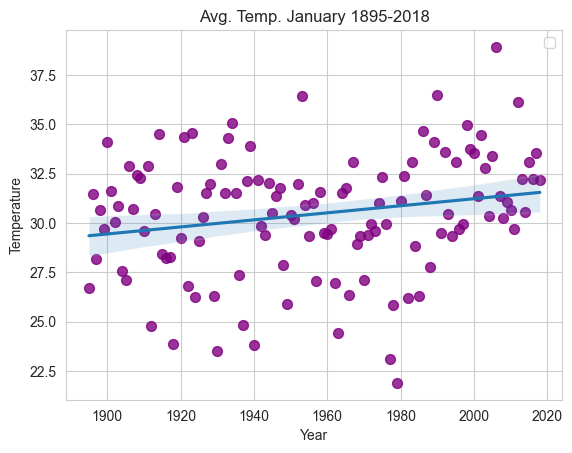

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

nyc = pd.read_csv('nyc.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

nyc['Year'] = nyc['Date'].floordiv(100)

average_temp_by_year = nyc.groupby('Year')['Temperature'].mean().reset_index()

# Seaborn regplot
sns.set_style('whitegrid')
axes.set_ylim(10,70)

# Regression line and individual data points
sns.regplot(x=average_temp_by_year['Year'], y=average_temp_by_year['Temperature'],
            scatter_kws={'s': 50, 'color': 'purple', 'label': 'Individual Data Points'})


plt.title('Avg. Temp. January 1895-2018')

plt.legend()

plt.show()










## 7.7 Predict Avg High Temp in NYC in January (Part 3): using scikit-learn estimator 
### Instructions from chapter 15.4

* Continuation of steps 7.6 1-5 previously completed Data Acquisition, Data Inspection, Data Cleaning, and Desriptive Statistics

### 1.Build the Model
### Introduction: Use test_train_split to split the data into parts for training and testing

In [32]:
## Dependencies:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import pyarrow
import scipy    

In [33]:
### check the shape of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( nyc.Date.values.reshape (-1,1), nyc.Temperature.values,random_state=11)

x_train.shape


(93, 1)

In [34]:
### check the shape of the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( nyc.Date.values.reshape (-1,1), nyc.Temperature.values,random_state=11)

x_test.shape

(31, 1)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

### to get the coefficient and intercept needed for equation (y=mx+b)

nyc = pd.read_csv('nyc.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'


X = nyc[['Date']]  
y = nyc['Temperature']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)


Coefficients: [0.00018623]
Intercept: -6.019515959794582


### 2. Test the Model: Using data in x_test


In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


nyc = pd.read_csv('nyc.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

X = nyc[['Date']]  
y = nyc['Temperature']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

# Predict on the test set
predicted = linear_regression.predict(X_test)
expected = y_test

# Print predicted and expected values
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e: .2f}')


predicted:  29.61, expected:  30.47
predicted:  30.95, expected:  26.31
predicted:  29.77, expected:  26.80
predicted:  30.70, expected:  29.93
predicted:  30.15, expected:  29.84


### 3. Predict: Use Model to predict "average high temp in Jan" for the year 2024

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

nyc = pd.read_csv('nyc.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

nyc['Date'] = pd.to_datetime(nyc['Date'])

nyc['Numeric_Date'] = (nyc['Date'] - nyc['Date'].min()).dt.days

X = nyc[['Numeric_Date']]
y = nyc['Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


# Define a function for prediction
def predict_temperature(year):
    numeric_date = (pd.to_datetime(year) - nyc['Date'].min()).days
    prediction = linear_regression.predict([[numeric_date]])
    return prediction[0]

# Predict temperature for the year 2024
prediction_2024 = predict_temperature('2024-01-01')
print(f'Predicted temperature for 2024: {prediction_2024:.2f}')


Predicted temperature for 2024: 30.44


c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 4.Visualizations: Use Seaborn to make scatter plot with a best fit line.

c:\Users\19564\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


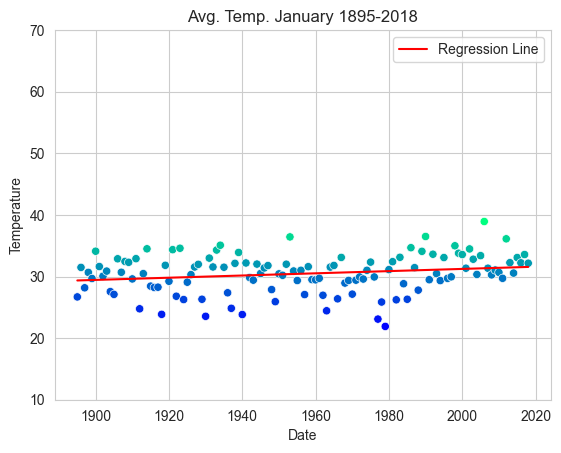

In [38]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


nyc = pd.read_csv('nyc.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'
nyc.Date= nyc.Date.floordiv(100)


X = nyc[['Date']]  
y = nyc['Temperature']


linear_regression = LinearRegression()
linear_regression.fit(X, y)

# scatter plot
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

# regression line
x_values = np.array([min(nyc['Date']), max(nyc['Date'])])
y_values = linear_regression.predict(x_values.reshape(-1, 1))
line = plt.plot(x_values, y_values, color='red', label='Regression Line')


plt.legend()

plt.title('Avg. Temp. January 1895-2018')


plt.show()



## 7.8 Insights: 

 In the first method in 7.6 section 5,  using SciPy Stats module lingress function is used to find the best fit line. First the slope is calculated at result of 0.001785 , then the intercept is calculated at the result of -4.4714. These 2 values are used to predict the average high temperature for January of 31.66. Then seaborn is used to produce a scatter plot for the avg. temperatures from January 1895 to 2018.
 The regression line displayed is gradually increasing from 28.5 degrees to 31. Although it may seem minor this data spans many years and reveals that the temperature is steadily climbing. There are points of temperature that are below the line and many points above the regression line. This may indicate season changes such as storms. The lowest temperature displayed is 21.90 while the highest temperature plotted is at 38.93. The statistics from the describe value help us confirm this data, and can be seen in the scatter plot with a concentrated range of temperatures around the 26.0 to 32.5 mark. 

In the second method in 7.7 the sci-kit learn estimator method is used. It is a lenghier process, but similar in that the coefficient and intercept are also calculated. Result for coefficent was .000186 and intercept results was -6.01951. Sklearn.model is used to split the date for testing and training. The linear regression in the using data in x_text section,is used to test the model to do a test for every fith value to compare predicted and expected temperatures. This was helpful to see that the predicted and expected temperature values are not that far apart. From the fist line of predictions, 30.47-29.61 =0.86  and in the last line of 29.84-30.15 = -0.31. Which indicates the predicted values are accurate. The avg. high temperature in January was calcuated at 30.44. Lastly a scatter plot is used to visualize the data. 

Both methods are equally good yeilding accurate data after the inspection and cleaning of the data. Both predicted incredably close results for the avg. high temperature of 2024. The fist method resulted at 31.66 and the second method resulted at 30.44, only a difference of 1.22. The scatter plots in both methods yeild the same best fit line and same concentrations of temperautres for january with the dots displayed. 

